<a href="https://colab.research.google.com/github/sayanGh-lab/Graph-neural-Network/blob/main/GNN_Pearson_019_6A_theta_eye_close_cluster5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy
!pip install keras-gcn
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from keras_gcn import GraphConv
import scipy.io
seed = 111;
np.random.seed(seed)
tf.random.set_seed(seed)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-gcn: filename=keras_gcn-0.15.0-py3-none-any.whl size=5864 sha256=afb0388c1f7996d6939e4db9636d79bb6cb970abb6673ec06209a620c29210d5
  Stored in directory: /root/.cache/pip/wheels/29/4b/c7/3464dafd3fa0cd402df6ada565c8cc5cfdbcad98f2126dbc9c
Successfully built keras-gcn
Mounted at /content/drive


In [ ]:
Aij = scipy.io.loadmat('/content/trn_data.mat')
Aij1 = scipy.io.loadmat('/content/adj_mat_valid.mat')
E=np.array(Aij["adj_mat_trn1"]) # EDGE INFO
E_test=np.array(Aij1["adj_mat_valid"])


#print(Aij)
#Label2=scipy.io.loadmat('/content/label_trn.mat')
Label3=scipy.io.loadmat('/content/label_valid.mat')
Y= np.array(Aij["labels_trn1"]) # Label
Y_test=np.array(Label3["labels_valid"]) # Label

#N=scipy.io.loadmat('/content/node_feature_trn.mat')
N1=scipy.io.loadmat('/content/node_fea_valid.mat')
X= np.array(Aij["node_fea_trn1"])  # Node
X_test=np.array(N1["node_fea_valid"])  # Node


print(X.shape, Y.shape, E.shape)
print(X_test.shape, Y_test.shape, E_test.shape)

(2686, 9, 6) (2686, 2) (2686, 9, 9)
(400, 9, 6) (400, 2) (400, 9, 9)


In [ ]:
num_nodes=9
node_dim=6
data_layer = tf.keras.layers.Input(shape=(num_nodes, node_dim))
edge_layer = tf.keras.layers.Input(shape=(num_nodes, num_nodes))
conv_layer = GraphConv(units=300, step_num=3,)([data_layer, edge_layer])
#conv_layer1 = GraphConv(units=500, step_num=3,)([data_layer, edge_layer])

conv_layer2 = GraphConv(units=1, step_num=3,)([conv_layer, edge_layer])
out1 = tf.squeeze(conv_layer2, 2)
out2 = tf.keras.layers.Dense(50, 'tanh')(out1)
#out2 = tf.keras.layers.Dense(50, 'tanh')(out2)
out = tf.keras.layers.Dense(2, 'softmax')(out2)
model = tf.keras.Model([data_layer, edge_layer], out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 6)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 9)]       0           []                               
                                                                                                  
 graph_conv (GraphConv)         (None, 9, 300)       2100        ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 graph_conv_1 (GraphConv)       (None, 9, 1)         301         ['graph_conv[0][0]',         

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
training_history = model.fit(
    [X, E],
    Y,
    epochs=50,
    shuffle=True,
    validation_data=([X_test,E_test], Y_test),
)

Epoch 1/50
84/84 [==============================] - 5s 21ms/step - loss: 0.6942 - accuracy: 0.5130 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
84/84 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/50
84/84 [==============================] - 1s 10ms/step - loss: 0.6903 - accuracy: 0.5074 - val_loss: 0.6858 - val_accuracy: 0.5600
Epoch 4/50
84/84 [==============================] - 1s 8ms/step - loss: 0.6499 - accuracy: 0.6199 - val_loss: 0.5532 - val_accuracy: 0.7850
Epoch 5/50
84/84 [==============================] - 1s 8ms/step - loss: 0.4246 - accuracy: 0.8038 - val_loss: 0.2313 - val_accuracy: 0.9400
Epoch 6/50
84/84 [==============================] - 1s 8ms/step - loss: 0.0914 - accuracy: 0.9862 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 7/50
84/84 [==============================] - 1s 9ms/step - loss: 0.0185 - accuracy: 0.9993 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 8/50
84/84 

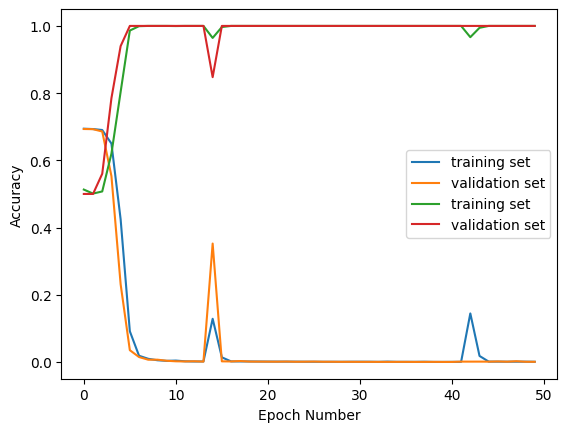

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

model.save('/content/drive/MyDrive/gnn_pearson_model/my_model_theta_eye_close_cluster5.h5')
new_model = tf.keras.models.load_model('/content/drive/MyDrive/gnn_pearson_model/my_model_theta_eye_close_cluster5.h5', custom_objects = {'GraphConv': GraphConv})

# Show the model architecture
new_model.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 6)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 9)]       0           []                               
                                                                                                  
 graph_conv (GraphConv)         (None, 9, 300)       2100        ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                              

In [ ]:
# load test data

Aij1 = scipy.io.loadmat('/content/adj_mat_test.mat')
N1=scipy.io.loadmat('/content/node_fea_test.mat')
E_test=np.array(Aij1["adj_mat_test_he13"])
X_test=np.array(N1["node_fea_test_he13"])  # Node

Label3=scipy.io.loadmat('/content/label_test.mat')
Y_test=np.array(Label3["labels_test2"]) # Label
#print(X_test.shape, Y_test.shape, E_test.shape)
labels = new_model.predict([X_test, E_test])
label5=labels;
print(label5.shape)
print(label5)
label5[list(range(label5.shape[0])), np.argmax(label5, 1)]=1
label5[np.where(label5 != 1)] = 0
label5
# Ensemble with voting
#print(np.mean(labels, axis = 0))

2/2 [==============================] - 0s 11ms/step
(40, 2)
[[1.26536275e-08 9.99999940e-01]
 [1.22131940e-08 9.99999940e-01]
 [3.76186748e-10 9.99999940e-01]
 [9.94809923e-09 9.99999940e-01]
 [2.43853879e-08 9.99999940e-01]
 [1.94872979e-10 9.99999940e-01]
 [4.87618252e-07 9.99999464e-01]
 [1.64057024e-09 9.99999940e-01]
 [7.16947224e-10 9.99999940e-01]
 [1.76597403e-08 9.99999940e-01]
 [3.69833741e-09 9.99999940e-01]
 [1.11063925e-09 9.99999940e-01]
 [7.24148685e-10 9.99999940e-01]
 [3.15339177e-09 9.99999940e-01]
 [1.45150869e-09 9.99999940e-01]
 [9.52508028e-09 9.99999940e-01]
 [1.73423564e-09 9.99999940e-01]
 [5.44795142e-08 9.99999940e-01]
 [1.34634547e-07 9.99999821e-01]
 [9.25259147e-10 9.99999940e-01]
 [4.27173186e-10 9.99999940e-01]
 [1.38563777e-07 9.99999821e-01]
 [2.11841189e-09 9.99999940e-01]
 [9.67589386e-08 9.99999821e-01]
 [5.38030998e-09 9.99999940e-01]
 [2.75942247e-09 9.99999940e-01]
 [4.19088728e-08 9.99999940e-01]
 [5.70454661e-09 9.99999940e-01]
 [1.55436393e-08

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)